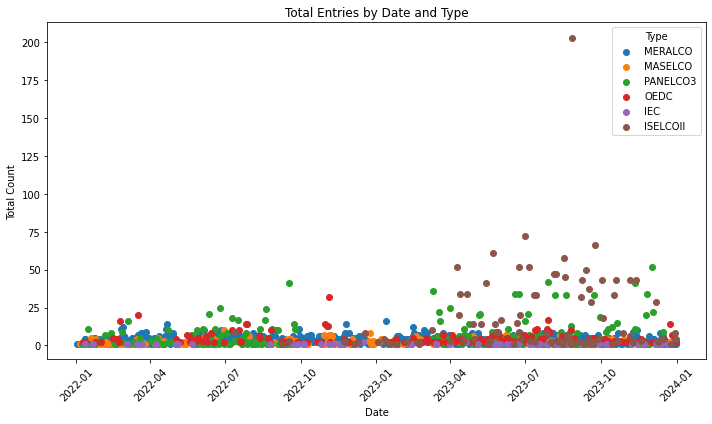

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data.csv')
df['date'] = pd.to_datetime(df['date'])

# Filter data for dates within 2022-2023
start_date = pd.Timestamp('2022-01-01')
end_date = pd.Timestamp('2023-12-31')
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Aggregate data by date and type, counting entries
aggregated_data = df.groupby(['date', 'type']).size().reset_index(name='count')

# Create a scatter plot
plt.figure(figsize=(10, 6))
for dtype in aggregated_data['type'].unique():
    subset = aggregated_data[aggregated_data['type'] == dtype]
    plt.scatter(subset['date'], subset['count'], label=dtype)

plt.xlabel('Date')
plt.ylabel('Total Count')
plt.title('Total Entries by Date and Type')
plt.legend(title='Type')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

           date                           location     type
5470 2018-04-30   Rizal Province (Antipolo City)\t  MERALCO
5471 2018-05-01                   Bulacan (Bocaue)  MERALCO
5472 2018-05-03                     Laguna (Bi�an)  MERALCO
5473 2018-05-03                 Laguna (Nagcarlan)  MERALCO
5474 2018-05-04                    Valenzuela City  MERALCO


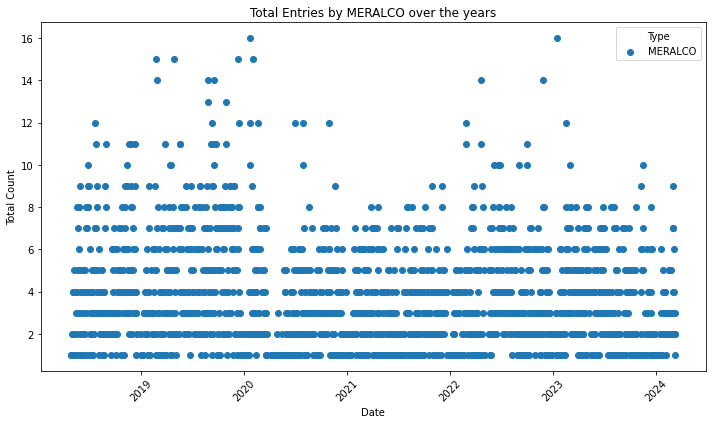

In [18]:
df = pd.read_csv('data.csv')
df['date'] = pd.to_datetime(df['date'])

df = df[(df['type'] == 'MERALCO')]
print(df.head())

# Aggregate data by date and type, counting entries
aggregated_data = df.groupby(['date']).size().reset_index(name='count')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_data['date'], aggregated_data['count'], label='MERALCO')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.title('Total Entries by MERALCO over the years')
plt.legend(title='Type')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

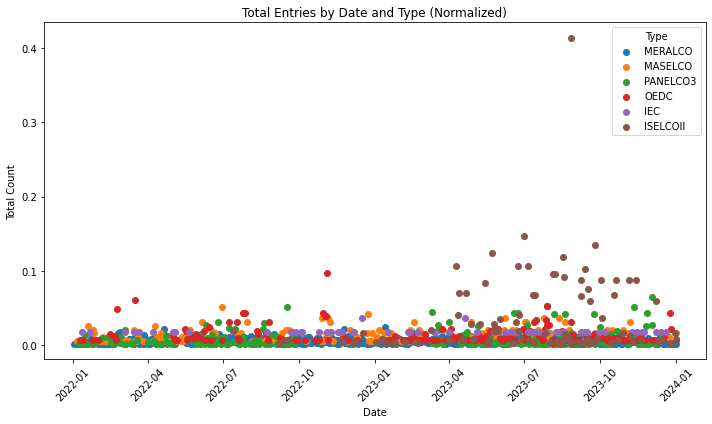

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data.csv')
df['date'] = pd.to_datetime(df['date'])

# Filter data for dates within 2022-2023
start_date = pd.Timestamp('2022-01-01')
end_date = pd.Timestamp('2023-12-31')
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Aggregate data by date and type, counting entries
unique_locations_per_type = df.groupby('type')['location'].nunique()
aggregated_data = df.groupby(['date', 'type']).size().reset_index(name='count')
aggregated_data['normalized_count'] = aggregated_data.apply(
    lambda row: row['count'] / unique_locations_per_type[row['type']], axis=1)

# Create a scatter plot
plt.figure(figsize=(10, 6))
for dtype in aggregated_data['type'].unique():
    subset = aggregated_data[aggregated_data['type'] == dtype]
    plt.scatter(subset['date'], subset['normalized_count'], label=dtype)

plt.xlabel('Date')
plt.ylabel('Total Count')
plt.title('Total Entries by Date and Type (Normalized)')
plt.legend(title='Type')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

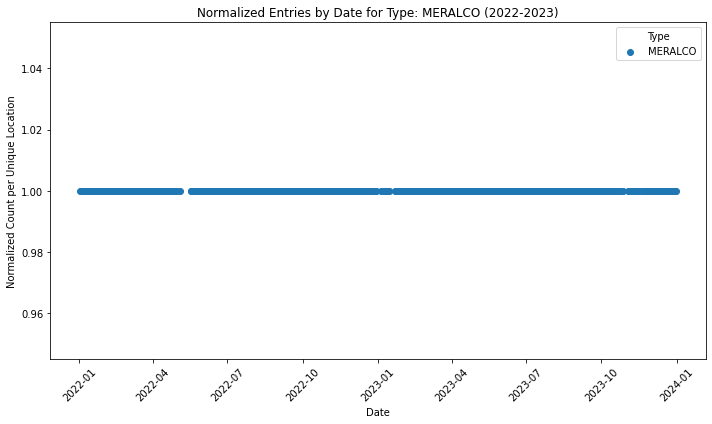

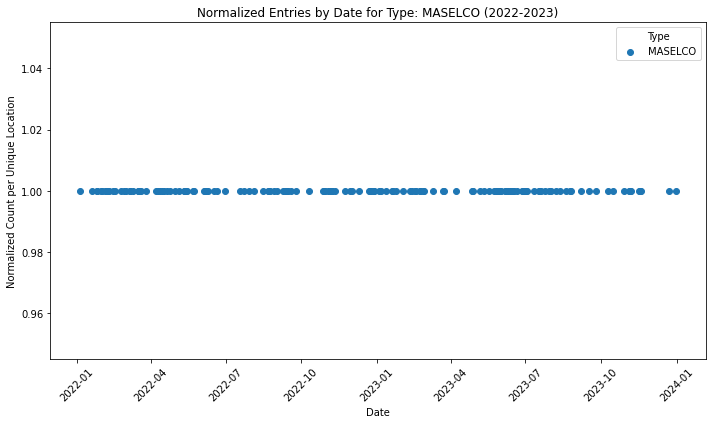

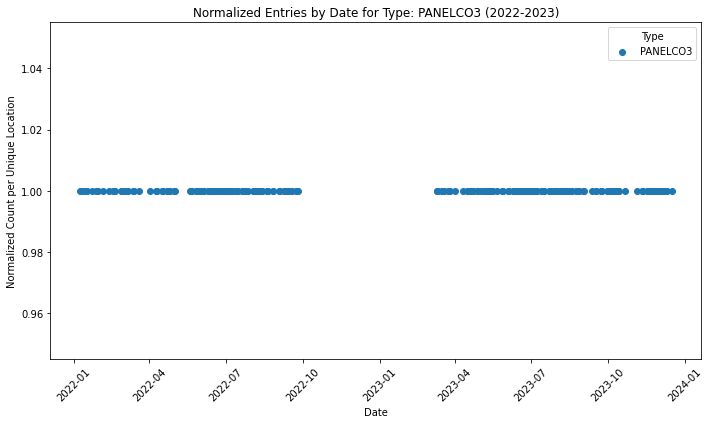

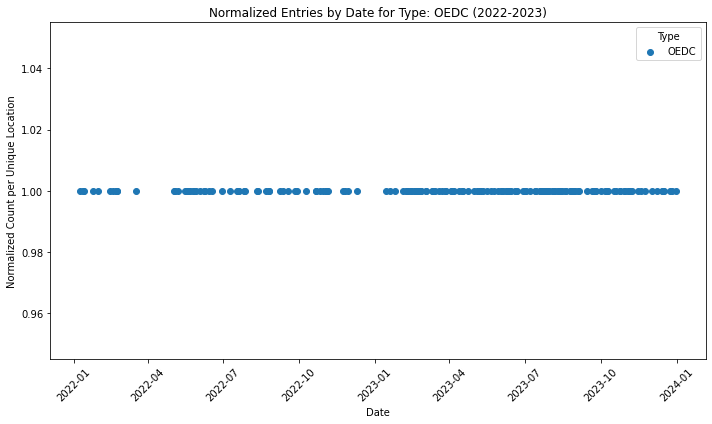

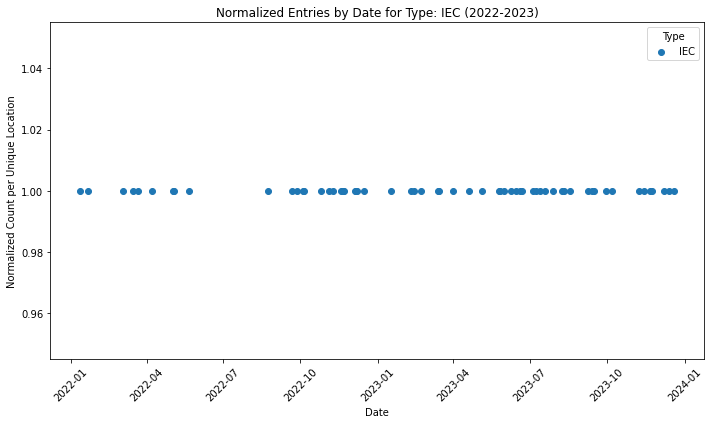

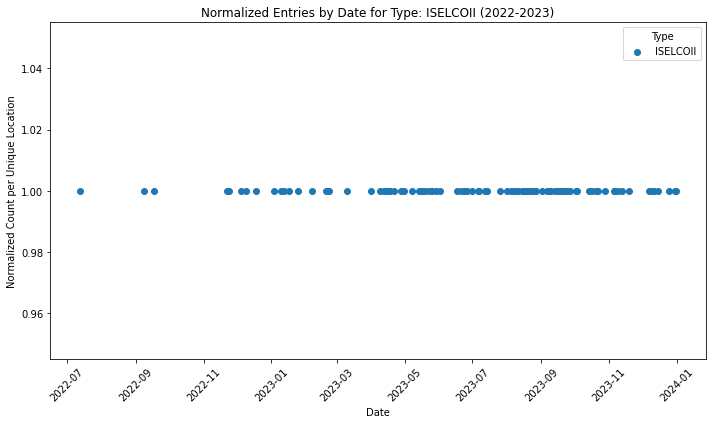

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data.csv')
df['date'] = pd.to_datetime(df['date'])

# Filter data for dates within 2022-2023
start_date = pd.Timestamp('2022-01-01')
end_date = pd.Timestamp('2023-12-31')
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Aggregate data by date and type, counting entries
aggregated_data = df.groupby(['date', 'type']).size().reset_index(name='count')
aggregated_data['has_brownout'] = aggregated_data.apply(
    lambda row: 1 if row['count'] else 0, axis=1)

# Create a scatter plot
for dtype in aggregated_data['type'].unique():
    plt.figure(figsize=(10, 6))
    subset = aggregated_data[aggregated_data['type'] == dtype]
    plt.scatter(subset['date'], subset['has_brownout'], label=dtype)

    plt.xlabel('Date')
    plt.ylabel('Normalized Count per Unique Location')
    plt.title(f'Normalized Entries by Date for Type: {dtype} (2022-2023)')
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.legend(title='Type')
    plt.tight_layout()  # Adjust layout to make room for label rotation
    plt.show()